<a href="https://colab.research.google.com/github/YaminMahdi/All-.ipynb/blob/master/Project_BHDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing API & Libraries**

In [ ]:
import gzip
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from google.colab import drive

# Importing the required Keras modules containing model and layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D

from google.colab import files
from keras.preprocessing import image
from PIL import Image, ImageDraw, ImageOps
import cv2

###**Loading Dataset From Drive**

In [ ]:
drive.mount('/content/drive/')

f = gzip.open('/content/drive/MyDrive/Project/Project_BHDR/bhand.pkl.gz','rb')
trainSet,validSet,testSet = pickle.load(f,encoding="latin1")
f.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).




```
# This is formatted as code
```

###**Preprocessing Data**

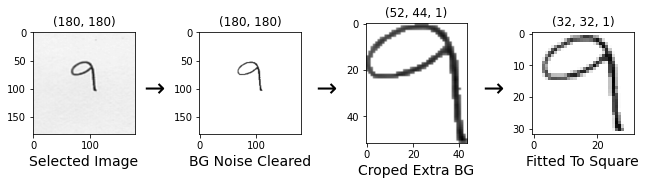

In [ ]:

def make_square(im, min_size=30, fill_color=(0)):
  x, y = im.size
  size = max(min_size, x, y)
  new_im = Image.new('L', (size, size), fill_color)
  new_im.paste(im, (int((size - x) / 2), int((size - y) / 2)))
  return new_im.resize((30,30))
def normalize_data(im,x=32):
  for i in range(x): # Outer loop  
    for j in range(x): # inner loop  
      if(im[i][j]<=0.5):
        im[i][j]=0.0 
def pre_prosess(path):
  fig = plt.figure(figsize=(9, 12))
  fig.subplots_adjust(left=0, right=2, bottom=0, top=2)

  im= cv2.imread(path,0)

  fig.add_subplot(1, 4, 1)
  plt.imshow(im, 'gray')
  plt.title(im.shape)
  plt.xlabel("Selected Image",fontsize=14)

  img_reverted= cv2.bitwise_not(im)
  im = img_reverted / 255
  #print(type(im))

  normalize_data(im,x=180) 
  #print(im)
  #print(im.shape)

  fig.add_subplot(1, 4, 2)
  plt.imshow(im, cmap=plt.cm.binary)
  plt.title(im.shape)
  plt.xlabel("BG Noise Cleared",fontsize=14)
  plt.ylabel("↓ ",fontsize=25)

  im= im.reshape(180,180,1)
  #print(im)
  im = image.array_to_img(im)
  #print(image.img_to_array(im).shape)

  imResize = im.crop(im.getbbox())

  fig.add_subplot(1, 4, 3)
  plt.imshow(imResize, cmap=plt.cm.binary)
  plt.title(image.img_to_array(imResize).shape)
  plt.xlabel("Croped Extra BG",fontsize=14)
  plt.ylabel("↓ ",fontsize=25)

  #print(image.img_to_array(imResize).shape)
  imResize = make_square(imResize)
  #imResize.show()
  # plt.imshow(imResize, cmap=plt.cm.binary)
  # plt.show()
  # print(image.img_to_array(imResize).shape)
  imResize = ImageOps.expand(imResize, border=1, fill=(0))

  fig.add_subplot(1, 4, 4)
  plt.imshow(imResize, cmap=plt.cm.binary)
  plt.title(image.img_to_array(imResize).shape)
  plt.xlabel("Fitted To Square",fontsize=14)
  plt.ylabel("↓ ",fontsize=25)
  plt.tight_layout()
  plt.show()
  #print(image.img_to_array(imResize).shape)
  im=image.img_to_array(imResize)

  return im

pre_prosess('/content/drive/MyDrive/Project/Project_BHDR/test_image/d00142.png')
print("")

###**Reshaping Data**

In [ ]:
print("TrainSet type: ",type(trainSet))
print("Shape: ", [len(a) for a in trainSet],end="\n\n")

print("Spliting TrainSet Tuple into Arrays (X_train, y_train).",end="\n\n")
X_train, y_train = trainSet
X_valid,y_valid = validSet
X_test,y_test = testSet

print("Converting Arrays to DataFrame (X_train, y_train).",end="\n\n")
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_valid = pd.DataFrame(X_valid)


y_train= pd.DataFrame(y_train)
y_test= pd.DataFrame(y_test)
y_valid = pd.DataFrame(y_valid)

#marging trainSet and validSet
X_test = pd.concat([X_test,X_valid])
y_test = pd.concat([y_test,y_valid])

print("X_train type: ",type(X_train))
print("Shape: ", X_train.shape)
print("y_train type: ",type(y_train))
print("Shape: ", y_train.shape)

X_train.head()

TrainSet type:  <class 'tuple'>
Shape:  [50000, 50000]

Spliting TrainSet Tuple into Arrays (X_train, y_train).

Converting Arrays to DataFrame (X_train, y_train).

X_train type:  <class 'pandas.core.frame.DataFrame'>
Shape:  (50000, 1024)
y_train type:  <class 'pandas.core.frame.DataFrame'>
Shape:  (50000, 1)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print("Original Data Shape: ",end='')
print(X_train.shape)

print("\nTransforming a 50000x1024 dataframe to a 50000x32x32x1 4D tensor for Keras modelling.\n")

train_images = X_train.values.reshape(X_train.shape[0], 32, 32, 1)
test_images = X_test.values.reshape(X_test.shape[0], 32, 32, 1)
#valid_images = X_valid.values.reshape(X_valid.shape[0], 32, 32, 1)

print("Reshaped Data Shape: ",end='')
print(train_images.shape)
print(type(train_images))

Original Data Shape: (50000, 1024)

Transforming a 50000x1024 dataframe to a 50000x32x32x1 4D tensor for Keras modelling.

Reshaped Data Shape: (50000, 32, 32, 1)
<class 'numpy.ndarray'>


###**Visualizing Data**

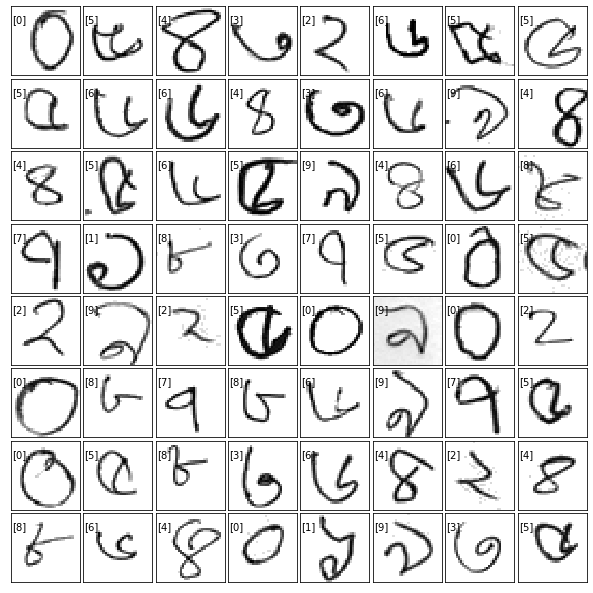

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 32x32 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(train_images[1000+i].reshape(32,32), cmap=plt.cm.binary, interpolation='nearest')
    
    # label of the image with the target value
    ax.text(0, 7, str(y_train.values[1000+i]))
plt.show()
print("")

###**Creating a model**

In [ ]:
# Creating a Sequential Model and adding the layers
model = Sequential([
                      Conv2D(64,(3,3),input_shape=(32,32,1)),
                      MaxPool2D(2,2),
                      Flatten(),
                      Dense(128,activation='relu'),
                      Dropout(0.2),
                      Dense(10, input_shape=(train_images.shape[1],),activation='softmax')
])
# model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1843328   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
print("")

# Model Compile
print("========================== Compiling  model ==========================")
model.compile(optimizer='adam',metrics=['acc'],loss='sparse_categorical_crossentropy')
print("")

# Accuracy Callback
class handwriting_acc_callback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('acc')>=0.99):
       print("\n\nModel has reached >99% accuracy :)\n")
       self.model.stop_training = True

handwriting_acc_callback = handwriting_acc_callback()
print("")
# Model Fitting
print("============================= Model- Fit =============================")
model.fit(train_images,y_train,epochs=100,validation_split=.2,callbacks=[handwriting_acc_callback])
print("")


========================== Compiling  model ==========================


============================= Model- Fit =============================
Epoch 1/100
1250/1250 [==============================] - 57s 45ms/step - loss: 0.3074 - acc: 0.9048 - val_loss: 0.1289 - val_acc: 0.9614
Epoch 2/100
1250/1250 [==============================] - 53s 43ms/step - loss: 0.1055 - acc: 0.9680 - val_loss: 0.0988 - val_acc: 0.9706
Epoch 3/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.0650 - acc: 0.9798 - val_loss: 0.1010 - val_acc: 0.9696
Epoch 4/100
1250/1250 [==============================] - 53s 42ms/step - loss: 0.0478 - acc: 0.9855 - val_loss: 0.0899 - val_acc: 0.9737
Epoch 5/100
1250/1250 [==============================] - 53s 43ms/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0928 - val_acc: 0.9748
Epoch 6/100
1250/1250 [==============================] - 53s 43ms/step - loss: 0.0309 - acc: 0.9895 - val_loss: 0.1104 - val_acc: 0.9725
Epoch 7/100
1250/1250 [==========

###**Result**

========================== Model Evaluation ==========================
625/625 [==============================] - 12s 19ms/step - loss: 0.1338 - acc: 0.9611

==================== Tensorflow Confusion Matrix =====================


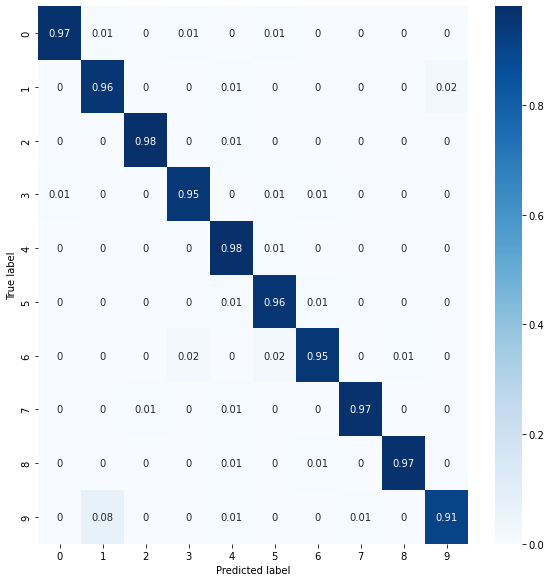

In [ ]:
print("========================== Model Evaluation ==========================")
model.evaluate(test_images,y_test)

print("\n==================== Tensorflow Confusion Matrix =====================")
import seaborn as sns
classes=[0,1,2,3,4,5,6,7,8,9]
y_pred=model.predict(test_images)
y_pred=np.argmax(y_pred,axis=1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index = classes, columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

###**Model Prediction Example**

In [ ]:
pred=[]
label=np.array([])
for i in range(24):
    pred.append(model.predict(X_valid.values[i].reshape(1,32,32)).argmax())
    label=np.concatenate((label, y_valid.values[i]))

print("True Label     :",label)
print("Pridcted Label :",pred)


True Label     : [7. 0. 7. 1. 7. 4. 5. 7. 2. 1. 6. 5. 5. 2. 3. 2. 1. 3. 7. 3. 4. 4. 7. 8.]
Pridcted Label : [7, 0, 7, 1, 7, 4, 5, 7, 2, 1, 6, 5, 5, 2, 3, 2, 1, 3, 7, 3, 4, 4, 7, 8]


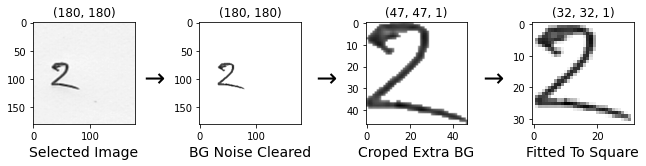

Predicted Value is: 7


In [ ]:
im=pre_prosess('/content/drive/MyDrive/Project/Project_BHDR/test_image/d00105.png')
class_label=model.predict(im.reshape(1,32,32)).argmax()
print("Predicted Value is:",class_label)